<a href="https://www.kaggle.com/code/aisuko/probabilistic-time-series-modeling-in-python?scriptVersionId=198449548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install -U -q "gluonts[torch]"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
dataset = PandasDataset(df, target="#Passengers")

In [4]:
dataset

PandasDataset<size=1, freq=M, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [5]:
# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

In [6]:
training_data

TrainingDataset(dataset=PandasDataset<size=1, freq=M, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>, splitter=OffsetSplitter(offset=-36))

/opt/conda/lib/python3.10/site-packages/gluonts/time_feature/_base.py:249: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
/opt/conda/lib/python3.10/site-packages/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type        | Params | In sizes                                                   | Out sizes   
--------------------------------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 5.66945 (best 5.66945), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 4.73938 (best 4.73938), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' reached 4.50213 (best 4.50213), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO: Epoch 3, global step 200: 'train_loss' reached 4.34032 (best 4.34032), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=3-step=200.ckpt' as top 1
INFO: Epoch 4, global step 250: 'train_loss' reached 4.28458 (best 4.28458), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=4-step=250.ckpt' as top 1
INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
/opt/conda/lib/python3.10/site-packages/lightning/fabr

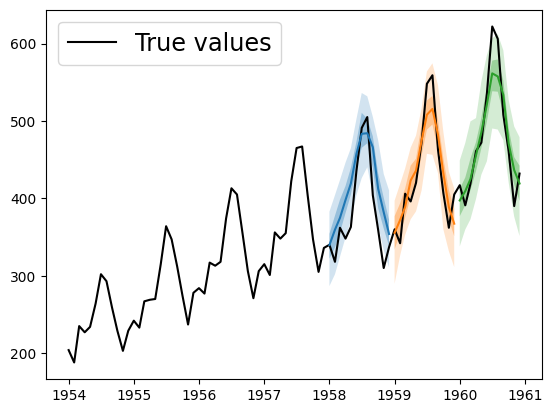

In [7]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
    forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

# Acknowledgement

* https://ts.gluon.ai/stable/index.html